### CO2 emissions dataset

In [1]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'data/CO2emissions.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now, 'df' contains your data from the CSV file
display(df)

# number of years in dataframe
unique_years = len(df['Year'].unique())
print(f"Total of unique years: {unique_years}, Period: {min(df['Year'].unique())} - {max(df['Year'].unique())}" )

# number of countries (including Global)
unique_countries = len(df['ISO 3166-1 alpha-3'].unique())
print(f"Total countries:{unique_countries}")

# check if all countries have all years
print("All countries have all years:",all(num == unique_years for num in df['ISO 3166-1 alpha-3'].value_counts().values))

# check if Total column contains missing values
print("'total' column has missing values:", all(num == True for num in df['Total'].isna().values))

# check if Total column contains zero values
print("'Total' column contains values=0:",True if len(df[df['Total']==0]) > 0 else False)
print(len(df[df['Total']==0]))

df_CO2 = df.copy()
display(df[df['Total'].isna()])

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,4.749682,1.908857,1.610910,0.940144,0.198416,0.051579,0.039776
63100,Global,WLD,2018,4.792753,1.919213,1.596350,0.979965,0.204225,0.053634,0.039366
63101,Global,WLD,2019,4.775633,1.896468,1.589920,0.984878,0.208309,0.056569,0.039490
63102,Global,WLD,2020,4.497423,1.807760,1.427353,0.963695,0.208844,0.051981,0.037789


Total of unique years: 272, Period: 1750 - 2021
Total countries:226
All countries have all years: False
'total' column has missing values: False
'Total' column contains values=0: True
1878


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
62827,International Transport,XIT,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62828,International Transport,XIT,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62829,International Transport,XIT,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62830,International Transport,XIT,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### UN-speeches dataset -> overview csv

In [2]:
# import pandas as pd

# # Replace 'your_file.csv' with the actual path to your CSV file
# file_path = 'data/Speakers_by_session.csv'

# # Load the CSV file into a DataFrame
# df = pd.read_csv(file_path, sep=';')

# # Now, 'df' contains your data from the CSV file
# display(df)

# unique_years = len(df['Year'].unique())
# print(f"Total of unique years: {unique_years}, Period: {min(df['Year'].unique())} - {max(df['Year'].unique())}" )

# # number of countries (including Global)
# unique_countries = len(df['ISO Code'].unique())
# print(f"Total countries:{unique_countries}")

# # check if all countries have all years
# print("All countries have all years:",all(num == unique_years for num in df['ISO Code'].value_counts().values))

In [3]:
# Wim Pilkes 11044632


# import required modules
import os
import pandas as pd

# when given the path name to a txt of a "valid" session,
# extract raw text file and metadata.
# Return mini dataframe with 1 row.
def make_row_for_df(path_session):

    # extract and clean metadata from the filename
    country, session_nr, year=  path_session.split('\\')[-1].split('_')
    year = int(year.split(".")[0])

    # open the txt file as string
    raw_txt = open(path_session, encoding="utf8").read() 

    # format the data
    new_row = {"ISO Code": country, "Year":year, "Session":session_nr, "txt":raw_txt}
    return pd.DataFrame(new_row, index=["0"])

df = pd.DataFrame()

# the data is a map called txt in the git
directory=('data/UNGDC_1946-2022/TXT')

# loop through the directory of differetn UN sessions
for session_map in os.listdir(directory):
    
    # only half the files are encoded in a way that we can use it, these are considered "valid"
    # the other half of the files is a copy of the same data, but encoded differently
    # all non- "valid" folders/files start with a dot ".", we donnot want these  
    if not session_map.startswith("."):
        
        path_session_map = os.path.join(directory, session_map)

        # Each session is split by country in different txt files. Loop through these.
        for session in os.listdir(path_session_map):

            # filter for "valid" files again.
            if not session.startswith("."):

                path_session = os.path.join(path_session_map, session)

                # find and organize the data for a session
                new_row = make_row_for_df(path_session)

                # add to DF
                df = pd.concat([df, new_row], ignore_index=True)

unique_years = len(df['Year'].unique())
print(f"Total of unique years: {unique_years}, Period: {min(df['Year'].unique())} - {max(df['Year'].unique())}" )

# number of countries (including Global)
unique_countries = len(df['ISO Code'].unique())
print(f"Total countries:{unique_countries}")

# check if all countries have all years
print("All countries have all years:",all(num == unique_years for num in df['ISO Code'].value_counts().values))
df
    

Total of unique years: 77, Period: 1946 - 2022
Total countries:201
All countries have all years: False


,ISO Code,Year,Session,txt
0,ARG,1946,01,At the resumption of the first session of the ...
1,AUS,1946,01,The General Assembly of the United Nations is ...
2,BEL,1946,01,The\tprincipal organs of the United Nations ha...
3,BLR,1946,01,As more than a year has elapsed since the Unit...
4,BOL,1946,01,Coming to this platform where so many distingu...
...,...,...,...,...
10563,WSM,2022,77,I extend Samoa’s congratulations to His Excell...
10564,YEM,2022,77,"At the outset, I would like to sincerely congr..."
10565,ZAF,2022,77,Allow me to join all speakers before me in con...
10566,ZMB,2022,77,"At the outset, we would like to congratulate M..."


### Merge CO2 emission datset with UN speeches dataset

In [4]:
# rename ISO code column to be able to merge
df_CO2 = df_CO2.rename(columns={'ISO 3166-1 alpha-3': 'ISO Code'})

# merge CO2 dataset with UN speeches on year and ISO Code of countries
df_merged = pd.merge(df, df_CO2, on=['Year', 'ISO Code'], how='inner')

# check for missing values
missing = [i for i in df_merged['Total'].isna().values if i== True]
# display(df_merged[df_merged['Total'].isna()])
print("'total' column has missing values: ", len(missing), ' Removing missing values...')

df_merged = df_merged[~df_merged['Total'].isna()]
display(df_merged)


# number of year and range
unique_years = len(df_merged['Year'].unique())
print(f"Total of unique years: {unique_years}, Period: {min(df_merged['Year'].unique())} - {max(df_merged['Year'].unique())}" )

# number of countries (including Global)
unique_countries = len(df_merged['ISO Code'].unique())
print(f"Total countries:{unique_countries}")

# check if all countries have all years
print("All countries have all years:",all(num == unique_years for num in df_merged['ISO Code'].value_counts().values))






'total' column has missing values:  139  Removing missing values...


,ISO Code,Year,Session,txt,Country,Total,Coal,Oil,Gas,Cement,Flaring,Other
1,AUS,1946,01,The General Assembly of the United Nations is ...,Australia,4.739173,4.690547,0.000000,0.000000,0.048626,0.000000,NaN
2,BEL,1946,01,The\tprincipal organs of the United Nations ha...,Belgium,6.742038,6.630408,0.000000,0.000000,0.111630,0.000000,NaN
7,CHL,1946,01,I shall occupy this rostrum for a few minutes ...,Chile,0.960232,0.909473,0.000000,0.000000,0.050759,0.000000,NaN
8,CHN,1946,01,My first words must be to express to the Gover...,China,0.067437,0.066873,0.000404,0.000000,0.000160,0.000000,NaN
13,FRA,1946,01,Before I speak of anything else I would like f...,France,4.101394,3.891538,0.179240,0.004638,0.025978,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10182,WSM,2021,76,"Mr. President,\nDistinguished delegates, Ladie...",Samoa,1.344282,0.000000,1.344282,0.000000,0.000000,0.000000,NaN
10183,YEM,2021,76,"At the outset, I would like to express my sinc...",Yemen,0.378289,0.007456,0.290844,0.006264,0.020120,0.053605,NaN
10184,ZAF,2021,76,President of the 76th Session of the UN Genera...,South Africa,7.339827,6.234256,0.880674,0.138634,0.085381,0.000882,NaN
10185,ZMB,2021,76,I wish to begin by congratulating His Excellen...,Zambia,0.394194,0.126514,0.218330,0.000000,0.049349,0.000000,NaN


Total of unique years: 76, Period: 1946 - 2021
Total countries:192
All countries have all years: False


### Descriptives of merged dataset (CO2 & UN speeches)

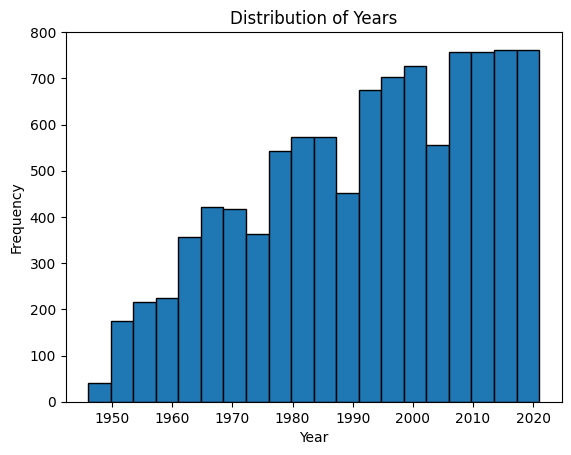

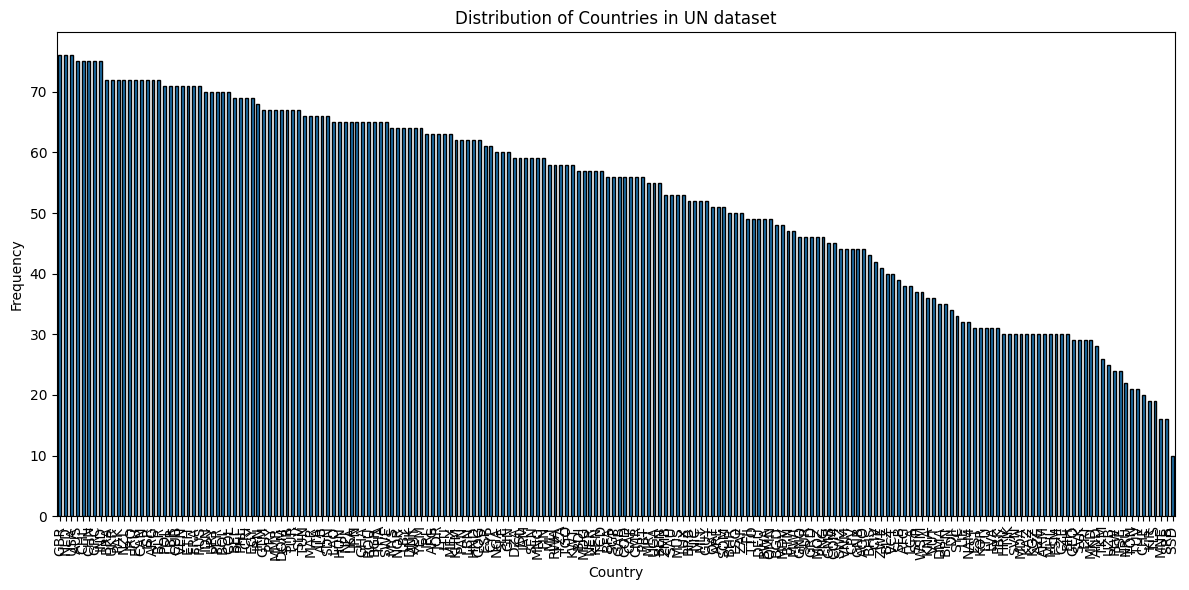

Descriptives about number of speeches per country
Minimum Count: 10
Maximum Count: 76
Mean Count: 52.33
Median Count: 56.0
Mode Count: 30


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df_merged['Year'], bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.show()

country_counts = df_merged['ISO Code'].value_counts()

# Plot the distribution of countries as a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
country_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Distribution of Countries in UN dataset')
plt.tight_layout()  # Ensures the labels fit properly
plt.show()

import statistics
country_counts = df_merged['ISO Code'].value_counts()
min_count = country_counts.min()
max_count = country_counts.max()
mean_count = round(country_counts.mean(),2)
median_count = country_counts.median()
mode_count = statistics.mode(country_counts)

# Print the calculated statistics
print("Descriptives about number of speeches per country")
print(f"Minimum Count: {min_count}")
print(f"Maximum Count: {max_count}")
print(f"Mean Count: {mean_count}")
print(f"Median Count: {median_count}")
print(f"Mode Count: {mode_count}")


In [54]:
words = [
    "alternative energy",
    "bond",
    "cap-and-trade",
    "carbon tax",
    "carbonrecycle technology",
    "clean energy",    
    "climate",
    "climate change",
    "climate action",
    "climate-related",
    "co2",
    "cop26",
    "deforestation",
    "drought",
    "emitter",
    "emissions,"
    "energy",
    "energy efficiency",
    "energy",
    "energy-efficient",
    "energy-saving",
    "esg",
    "ets",
    "flood",
    "fund",
    "fossil fuel",
    "framework",
    "government",
    "green energy",
    "greenhouse gas",    
    "hurricane",
    "investment",
    "kyoto protocol",
    "low carbon",
    "methane",
    "mitigation",
    "net-zero",
    "paris agreement",
    "quota",
    "recycle",
    "regulation",
    "renewable",
    "research",
    "research and development",
    "subsidy",
    "tariff",
    "wildfire"  
]

In [120]:
import scipy
# Function counts occurences of tokens in text and returns the sum
def get_CO2_score(tokenlist, text):
    token_counts = {token: 0 for token in tokenlist}

    # Iterate through the tokens and count their occurrences in the text
    for token in tokenlist:
        # Using a case-insensitive search by converting both the token and text to lowercase
        token_counts[token] = text.lower().count(token.lower())

    return (sum(token_counts.values()), token_counts)

# function adds CO2 score row to dataframe
def add_CO2_score_to_df(df, tokenlist):
    score_list = []
    score_dict_list = []
    for index, row in df.iterrows():
        score, score_dict = get_CO2_score(tokenlist, row['txt'])
        score_list.append(score)
        score_dict_list.append(score_dict)

    # df['CO2_score'] = min_max_scaling(score_list)
    df['CO2_score'] = score_list
    df['token_dict'] = score_dict_list
    return df


# df_recent = df_merged[df_merged['Year']>2010]
df_score = add_CO2_score_to_df(df_merged, words)
correlation = scipy.stats.pearsonr(df_score['CO2_score'], df_score['Total'])
print(f"Correlation between the CO2 score of the speech and CO2 emission: {correlation}")
display(df_score)

Correlation between the CO2 score of the speech and CO2 emission: PearsonRResult(statistic=-0.06988244496611788, pvalue=2.3376445272706143e-12)


,ISO Code,Year,Session,txt,Country,Total,Coal,Oil,Gas,Cement,Flaring,Other,CO2_score,token_dict
1,AUS,1946,01,The General Assembly of the United Nations is ...,Australia,4.739173,4.690547,0.000000,0.000000,0.048626,0.000000,NaN,29,"{'alternative energy': 0, 'bond': 0, 'cap-and-..."
2,BEL,1946,01,The\tprincipal organs of the United Nations ha...,Belgium,6.742038,6.630408,0.000000,0.000000,0.111630,0.000000,NaN,15,"{'alternative energy': 0, 'bond': 0, 'cap-and-..."
7,CHL,1946,01,I shall occupy this rostrum for a few minutes ...,Chile,0.960232,0.909473,0.000000,0.000000,0.050759,0.000000,NaN,8,"{'alternative energy': 0, 'bond': 0, 'cap-and-..."
8,CHN,1946,01,My first words must be to express to the Gover...,China,0.067437,0.066873,0.000404,0.000000,0.000160,0.000000,NaN,18,"{'alternative energy': 0, 'bond': 0, 'cap-and-..."
13,FRA,1946,01,Before I speak of anything else I would like f...,France,4.101394,3.891538,0.179240,0.004638,0.025978,0.000000,NaN,9,"{'alternative energy': 0, 'bond': 0, 'cap-and-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182,WSM,2021,76,"Mr. President,\nDistinguished delegates, Ladie...",Samoa,1.344282,0.000000,1.344282,0.000000,0.000000,0.000000,NaN,38,"{'alternative energy': 0, 'bond': 0, 'cap-and-..."
10183,YEM,2021,76,"At the outset, I would like to express my sinc...",Yemen,0.378289,0.007456,0.290844,0.006264,0.020120,0.053605,NaN,12,"{'alternative energy': 0, 'bond': 0, 'cap-and-..."
10184,ZAF,2021,76,President of the 76th Session of the UN Genera...,South Africa,7.339827,6.234256,0.880674,0.138634,0.085381,0.000882,NaN,15,"{'alternative energy': 0, 'bond': 1, 'cap-and-..."
10185,ZMB,2021,76,I wish to begin by congratulating His Excellen...,Zambia,0.394194,0.126514,0.218330,0.000000,0.049349,0.000000,NaN,20,"{'alternative energy': 0, 'bond': 0, 'cap-and-..."


In [101]:
print(f"Mean CO2 score in speeches: {(df_score['CO2_score'].values).mean()}")
import statistics

print(f"Mean CO2 score in speeches: {statistics.mode(df_score['CO2_score'].values)}")

print(f"number of speeches with score 0: {len(df_score[df_score['CO2_score']==0])} out of {len(df_score)}")
print(f"Highest score: {max(df_score['CO2_score'])}")

Mean CO2 score in speeches: 15.24781050955414
Mean CO2 score in speeches: 9
number of speeches with score 0: 52 out of 10048
highest score: 214


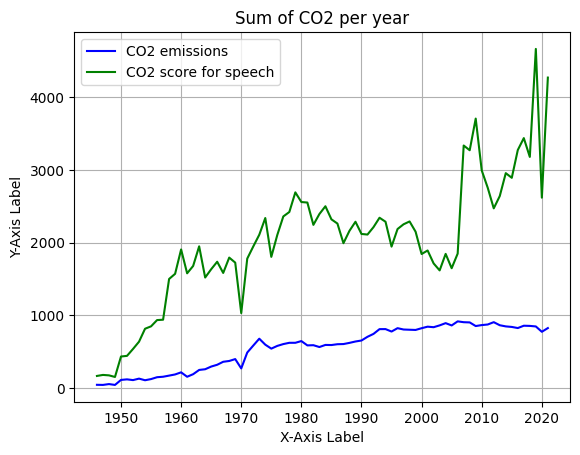

In [80]:
import matplotlib.pyplot as plt

result_sum = df_score.groupby('Year')[['Total', 'CO2_score']].sum()

# Sample data for multiple lines
x_values = result_sum.index
y_values1 = result_sum['Total']  # Data for the first line
y_values2 = result_sum['CO2_score']  # Data for the second line

# Plot multiple lines
plt.plot(x_values, y_values1, color='blue', label='CO2 emissions')
plt.plot(x_values, y_values2, color='green', label='CO2 score for speech')

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Sum of CO2 per year')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


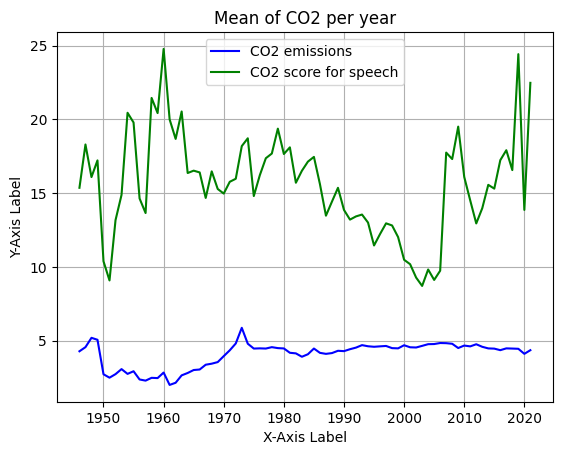

In [125]:
import matplotlib.pyplot as plt

result_mean = df_score.groupby('Year')[['Total', 'CO2_score']].mean()

# Sample data for multiple lines
x_values = result_mean.index
y_values1 = result_mean['Total']  # Data for the first line
y_values2 = result_mean['CO2_score']  # Data for the second line

# Plot multiple lines
plt.plot(x_values, y_values1, color='blue', label='CO2 emissions')
plt.plot(x_values, y_values2, color='green', label='CO2 score for speech')

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Mean of CO2 per year')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()



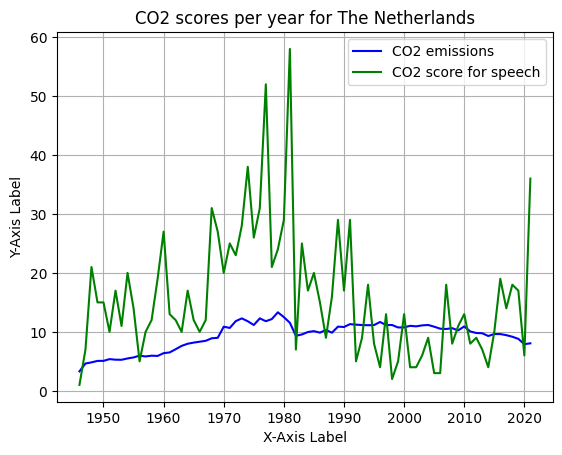

In [87]:
import matplotlib.pyplot as plt

# Sample data for multiple lines
df_score = df_score.sort_values(by=['Year'])
x_values = df_score[df_score['ISO Code'] == 'NLD']['Year']
y_values1 = df_score[df_score['ISO Code'] == 'NLD']['Total'] # Data for the first line
y_values2 = df_score[df_score['ISO Code'] == 'NLD']['CO2_score']  # Data for the second line

# Plot multiple lines
plt.plot(x_values, y_values1, color='blue', label='CO2 emissions')
plt.plot(x_values, y_values2, color='green', label='CO2 score for speech')

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('CO2 scores per year for The Netherlands')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [102]:
# from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')



# # https://www.w3resource.com/python-exercises/nltk/nltk-tokenize-exercise-3.php
# # words = word_tokenize('klimaarverandering is erg')

# def convert_text_to_keyword_counts(speech_string, keywords):
#     keywords = [keyword.lower() for keyword in keywords]
#     result = 0
#     words = word_tokenize(speech_string)
#     print(words)
#     words = [word.lower() for word in words]
#     for word in words:
#         if word in keywords:
#             result += 1
#     return result
    
    

# def convert_list_of_speeches_to_list_of_keyword_counts(speeches, keywords):
#     result = []
#     i = 1
#     for speech in speeches:
#         print(f"{i} out of {len(speeches)}")
#         i +=1
#         result.append(convert_text_to_keyword_counts(speech, keywords))
#     return result


# # print(convert_list_of_speeches_to_list_of_keyword_counts(['klimaatverandering is erg', 
# #                                                'Pilkes is geen Pickle. Toch.', 
# #                                                'Minder CO2! Minder CO2! Fossielle brandstoffen zijn stom.'], 
# #                                               keywords=['klimaatverandering', "CO2", "fossielle"]))

# def convert_list_of_speeches_to_normalized_scores(speeches, keywords):
#     '''
        
    
#     '''
#     keywords = [keyword.lower() for keyword in keywords]
#     list_of_counts = convert_list_of_speeches_to_list_of_keyword_counts(speeches, keywords)
#     # ensure all counts have a value between 0 and 1
#     max_count = max(list_of_counts)
#     min_count = min(list_of_counts)
#     denom = max_count - min_count 
#     if denom == 0:
#         denom = 1
#     normalized_counts = [(x - min_count) / (denom) for x in list_of_counts]
#     return normalized_counts, list_of_counts



# convert_list_of_speeches_to_normalized_scores(df_merged.head(1)['txt'], 
#                                               keywords=words)



In [103]:
# scores_tokens, counts = convert_list_of_speeches_to_normalized_scores(df_merged['txt'], 
#                                               keywords=words)

# df_no_stemming = df_merged.copy()
# df_no_stemming['norm_score'] = scores_tokens
# df_no_stemming['sum_score'] = counts

In [104]:
# correlation = df_no_stemming['Total'].corr(df_no_stemming['norm_score'])
# print(correlation)

In [105]:
# display(df_no_stemming)

In [106]:
# import nltk
# from nltk.stem import PorterStemmer

# # Initialize the NLTK Porter Stemmer
# stemmer = PorterStemmer()

# # Stem and lowercase the tokens
# stemmed_tokens = [stemmer.stem(token.lower()) for token in words]

# # Print the list of stemmed tokens
# print(stemmed_tokens)

# scores_tokens_stem, counts_stem = convert_list_of_speeches_to_normalized_scores(df_merged['txt'], 
#                                               keywords=stemmed_tokens)

# df_stemming = df_merged.copy()
# df_stemming['norm_score'] = scores_tokens_stem
# df_stemming['sum_score'] = counts_stem


In [107]:

# from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd

# # Sample list of speeches
# speeches = ["Your first speech text here.",
#             "Your second speech text here.",
#             "Your third speech text here."]


# tokens = ['first', 'speech']

# # df_short = df_recent.head()

# # Create a TfidfVectorizer object
# vectorizer = TfidfVectorizer(vocabulary=tokens)

# # Compute TF-IDF scores for the speeches based on the token list
# tfidf_matrix = vectorizer.fit_transform(speeches)

# # Convert the TF-IDF matrix to a DataFrame for better visualization
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# # Now tfidf_df contains the TF-IDF scores for each token in each speech
# print(tfidf_df)

In [108]:
# print(words)

In [109]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Sample corpus
# corpus = df_merged.head(10)['txt']

# # List of specific tokens for which you want to calculate TF-IDF scores
# tokens_to_calculate = words

# # Step 1: Create the TF-IDF vectorizer with specific tokens as vocabulary
# vectorizer = TfidfVectorizer(vocabulary=tokens_to_calculate)

# # Step 2: Transform the corpus to TF-IDF vectors using the specific tokens
# tfidf_matrix = vectorizer.fit_transform(corpus)

# # Step 3: Get the feature names (tokens)
# feature_names = vectorizer.get_feature_names_out()

# # Step 4: Get the TF-IDF scores for the specific tokens in each document
# for i, token in enumerate(tokens_to_calculate):
#     # Find the index of the token in the list of feature names
#     token_index = feature_names.tolist().index(token)
#     # Get the corresponding column from the TF-IDF matrix
#     tfidf_scores = tfidf_matrix[:, token_index].toarray().flatten()
#     print(f"TF-IDF scores for '{token}' in the corpus:")
#     for j, score in enumerate(tfidf_scores):
#         print(f"  Document {j + 1}: {score:.4f}")


In [110]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Sample corpus
# corpus =df_merged.head(10)['txt']

# # Step 1: Create the TF-IDF vectorizer
# vectorizer = TfidfVectorizer()

# # Step 2: Fit and transform the corpus to TF-IDF vectors
# tfidf_matrix = vectorizer.fit_transform(corpus)

# # Step 3: Get the feature names (tokens)
# feature_names = vectorizer.get_feature_names_out()

# # Step 4: Print TF-IDF scores for each token in the corpus
# for i, doc in enumerate(corpus):
#     print(f"Document {i + 1}:")
#     for j, token in enumerate(feature_names):
#         tfidf_score = tfidf_matrix[i, j]
#         if tfidf_score > 0:
#             print(f"  {token}: {tfidf_score:.4f}")
